In [1]:
# Import statements...
import pandas as pd
import numpy as np
import re
import nltk
import string

In [2]:
# Importing csv file 
df = pd.read_csv('clean_nus_sms.csv')
df.head()

,Unnamed: 0,id,Message,length,country,Date
0,0,10120,Bugis oso near wat...,21,SG,2003/4
1,1,10121,"Go until jurong point, crazy.. Available only ...",111,SG,2003/4
2,2,10122,I dunno until when... Lets go learn pilates...,46,SG,2003/4
3,3,10123,Den only weekdays got special price... Haiz......,140,SG,2003/4
4,4,10124,Meet after lunch la...,22,SG,2003/4


## Making lowercase 

In [3]:
df = df.dropna()
df['messages_clean'] = df['Message'].str.lower()
df.head()

,Unnamed: 0,id,Message,length,country,Date,messages_clean
0,0,10120,Bugis oso near wat...,21,SG,2003/4,bugis oso near wat...
1,1,10121,"Go until jurong point, crazy.. Available only ...",111,SG,2003/4,"go until jurong point, crazy.. available only ..."
2,2,10122,I dunno until when... Lets go learn pilates...,46,SG,2003/4,i dunno until when... lets go learn pilates...
3,3,10123,Den only weekdays got special price... Haiz......,140,SG,2003/4,den only weekdays got special price... haiz......
4,4,10124,Meet after lunch la...,22,SG,2003/4,meet after lunch la...


## Remove HTML tags and URLs

In [4]:
def remove_url(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub('',text)

def remove_html(text):
    html_pattern = re.compile('<.*?>')
    return html_pattern.sub(r'', text)

df["messages_clean"] = df["messages_clean"].apply(lambda text: remove_url(text))
df["messages_clean"] = df["messages_clean"].apply(lambda text: remove_html(text))

## Remove punctuations 

In [5]:
def remove_punc(text):
    punc = re.compile(r'[^\w\s]')
    return punc.sub('',text)

df['messages_clean'] = df['messages_clean'].apply(lambda text: remove_punc(text))
df.head()

,Unnamed: 0,id,Message,length,country,Date,messages_clean
0,0,10120,Bugis oso near wat...,21,SG,2003/4,bugis oso near wat
1,1,10121,"Go until jurong point, crazy.. Available only ...",111,SG,2003/4,go until jurong point crazy available only in ...
2,2,10122,I dunno until when... Lets go learn pilates...,46,SG,2003/4,i dunno until when lets go learn pilates
3,3,10123,Den only weekdays got special price... Haiz......,140,SG,2003/4,den only weekdays got special price haiz cant ...
4,4,10124,Meet after lunch la...,22,SG,2003/4,meet after lunch la


## Tokenize messages

In [6]:
from nltk.tokenize import word_tokenize
# messages = df['messages_clean'].tolist()

# messages_token = [nltk.word_tokenize(message) for message in messages] --> This will crash your computer

df['messages_tokenized'] = df['messages_clean'].apply(lambda x: nltk.word_tokenize(x))
df.head()

,Unnamed: 0,id,Message,length,country,Date,messages_clean,messages_tokenized
0,0,10120,Bugis oso near wat...,21,SG,2003/4,bugis oso near wat,"[bugis, oso, near, wat]"
1,1,10121,"Go until jurong point, crazy.. Available only ...",111,SG,2003/4,go until jurong point crazy available only in ...,"[go, until, jurong, point, crazy, available, o..."
2,2,10122,I dunno until when... Lets go learn pilates...,46,SG,2003/4,i dunno until when lets go learn pilates,"[i, dunno, until, when, lets, go, learn, pilates]"
3,3,10123,Den only weekdays got special price... Haiz......,140,SG,2003/4,den only weekdays got special price haiz cant ...,"[den, only, weekdays, got, special, price, hai..."
4,4,10124,Meet after lunch la...,22,SG,2003/4,meet after lunch la,"[meet, after, lunch, la]"


# Would be doing sentiment analysis using Naive Bayes Algorithm

In [7]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

## Firstly would be cleaning countries data, there are many repeats in the data 

In [8]:
df = df.replace({'country' : {'SG':'Singapore',
                         'USA':"United States of America",
                         'United States':'United States of America',
                         'india':'India',
                         'INDIA':'India',
                         'srilanka':'Sri Lanka',
                         'MY':'Malaysia',
                         'BARBADOS':'Barbados',
                         'UK':'United Kingdom',
                         'jamaica':'Jamaica',
                         'unkown':'Unkown'}})

Text(0.5, 1.0, 'Top 10 Countries')

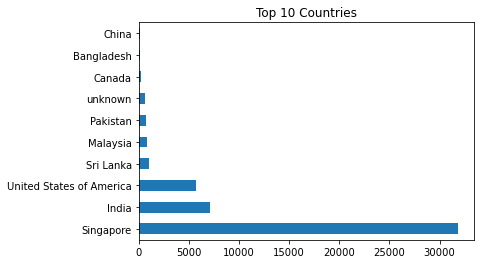

In [9]:
countries = np.unique(df['country'].tolist())
countries_count = df['country'].value_counts()
countries_count.head(10).plot.barh()
plt.title('Top 10 Countries')

## Sentiment analysis would require some training data, the data we have would be useful for testing the model. To train the model, I would download some external 'positive' and 'negative' tweets to build a good classifier.

In [10]:
nltk.download('twitter_samples')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package twitter_samples to
[nltk_data]     /Users/dhruvanand/nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/dhruvanand/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/dhruvanand/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [11]:
from nltk.corpus import twitter_samples

In [12]:
positive_tweets = twitter_samples.strings('positive_tweets.json')
negative_tweets = twitter_samples.strings('negative_tweets.json')

## Looking through the data, there are many URLs and HTML tags. I'll do some cleaning for the training data. 

In [13]:
positive_tweets_token = twitter_samples.tokenized('positive_tweets.json')
negative_tweets_token = twitter_samples.tokenized('negative_tweets.json')

In [28]:
pos_clean = []
neg_clean = []

for tweet in positive_tweets_token:
    clean = []
    for token in tweet:
        url_removed = remove_url(token)
        html_removed = remove_html(url_removed)
        
        clean.append(html_removed)
    pos_clean.append(clean)
    
for tweet in negative_tweets_token:
    clean = []
    for token in tweet:
        url_removed = remove_url(token)
        html_removed = remove_html(url_removed)
        
        clean.append(html_removed)
    neg_clean.append(clean)

In [42]:
list_of_all_tweets = pos_clean + neg_clean
all_tweets = [token for lst in list_of_all_tweets for token in lst]

In [84]:
# Frequency distribution...
all_tokens = nltk.FreqDist(token for token in all_tweets)
features = [word for (word,count) in all_tokens.most_common(20000)]

In [85]:
# A function to check do the sentence has the features
def check_features(document,features):
    documents_token = set(document)
    present_features = {}
    
    for token in features:
        present_features[token] = (token in documents_token)
    
    return present_features

## Giving labels to our data 

In [86]:
import random
positive_tws = [(tweet, "Positive") for tweet in pos_clean]
negative_tws = [(tweet, "Negative") for tweet in neg_clean]

all_labeled_tweets = positive_tws + negative_tws
random.shuffle(all_labeled_tweets)


features_set = [(check_features(documents,features),l) for (documents,l) in all_labeled_tweets]

In [87]:
## Seperating Training and Test data
training_data, test_data = features_set[:7000], features_set[7000:]

## Let's start training and test our model

In [88]:
classifier = nltk.NaiveBayesClassifier.train(training_data)
# Mistake done, features list should be a dict.

from nltk import classify
print(f"Accuracy is: {classify.accuracy(classifier,test_data)}")

Accuracy is: 0.994


## Now we test our model with the text messages

In [98]:
test_message = "i love you"
test_message = test_message.lower().split(" ")

classifier.classify(dict([token,True] for token in test_message))

'Positive'

In [90]:
sentiments = []

for message in df['messages_tokenized']:
    sentiments.append(str((classifier.classify(dict([token, True] for token in message)))))
    
df['Sentiment'] = sentiments
df['Sentiment'].value_counts()

Negative    31905
Positive    16690
Name: Sentiment, dtype: int64

Model predicts there are 65.65490276777446% of the messages are Negative


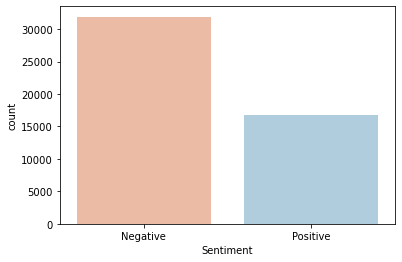

In [91]:
import seaborn as sns
sns.countplot(x='Sentiment', data=df, palette='RdBu')
print(f"Model predicts there are {df['Sentiment'].value_counts(normalize=True)[0] * 100}% of the messages are Negative")

['hey',
 'what',
 'time',
 'is',
 'your',
 'driving',
 'on',
 'fri',
 'we',
 'go',
 'for',
 'evaluation',
 'on',
 'fri']